<a href="https://colab.research.google.com/github/VyPham23/Final-VyPham-Weather-data-processing-and-visualisation/blob/main/Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import plotly.graph_objects as go

#Question 1
Process data

In [ ]:
weather = pd.read_csv('/content/weather.csv')
weather.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


#Question 2
Show the shape and types of data

In [ ]:
weather.shape

(139773, 9)

In [ ]:
weather.dtypes

site_id                 int64
timestamp              object
air_temperature       float64
cloud_coverage        float64
dew_temperature       float64
precip_depth_1_hr     float64
sea_level_pressure    float64
wind_direction        float64
wind_speed            float64
dtype: object

#Question 3
Count the missing data

In [ ]:
def missing_statistics(weather):    
    statitics = pd.DataFrame(weather.isnull().sum()).reset_index()
    statitics.columns=['COLUMN NAME',"MISSING VALUES"]
    statitics['TOTAL ROWS'] = weather.shape[0]
    statitics['% MISSING'] = round((statitics['MISSING VALUES']/statitics['TOTAL ROWS'])*100,2)
    return statitics

In [ ]:
time_format = "%Y-%m-%d %H:%M:%S"
start_date = dt.datetime.strptime(weather['timestamp'].min(),time_format)
end_date = dt.datetime.strptime(weather['timestamp'].max(),time_format)
total_hours = int(((end_date - start_date).total_seconds() + 3600) / 3600)
hours_list = [(end_date - dt.timedelta(hours=x)).strftime(time_format) for x in range(total_hours)]

missing_hours = []
for site_id in range(16):
    site_hours = np.array(weather[weather['site_id'] == site_id]['timestamp'])
    new_rows = pd.DataFrame(np.setdiff1d(hours_list,site_hours),columns=['timestamp'])
    new_rows['site_id'] = site_id
    weather_df = pd.concat([weather,new_rows])

weather_df = weather_df.reset_index(drop=True)

In [ ]:
missing_statistics(weather_df)

,COLUMN NAME,MISSING VALUES,TOTAL ROWS,% MISSING
0,site_id,0,140103,0.00
1,timestamp,0,140103,0.00
2,air_temperature,385,140103,0.27
3,cloud_coverage,69503,140103,49.61
4,dew_temperature,443,140103,0.32
5,precip_depth_1_hr,50619,140103,36.13
6,sea_level_pressure,10948,140103,7.81
7,wind_direction,6598,140103,4.71
8,wind_speed,634,140103,0.45


#Question 4
Format the date and time

In [ ]:
weather['date'] = pd.to_datetime(weather['timestamp'])

In [ ]:
weather['year'] = weather['date'].dt.year
weather['month'] = weather['date'].dt.month
weather['day'] = weather['date'].dt.day
weather['hour'] = weather['date'].dt.hour
weather.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,date,year,month,day,hour
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,2016-01-01 00:00:00,2016,1,1,0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5,2016-01-01 01:00:00,2016,1,1,1
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0,2016-01-01 02:00:00,2016,1,1,2
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0,2016-01-01 03:00:00,2016,1,1,3
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6,2016-01-01 04:00:00,2016,1,1,4


#Question 5
Find the min, max, mean temperature of each month

In [ ]:
features = ['air_temperature','cloud_coverage', 'precip_depth_1_hr', 'wind_direction', 'wind_speed']
weather[features] = weather[features].fillna(0)

In [ ]:
tem = weather.groupby('month').agg({'air_temperature': ['mean', 'min', 'max']})

In [ ]:
print(tem)

      air_temperature            
                 mean   min   max
month                            
1            3.828216 -25.6  29.4
2            5.545727 -28.8  31.7
3           10.233398 -22.1  32.8
4           12.581823 -17.2  35.6
5           17.439549  -1.1  38.3
6           22.052617   0.0  47.2
7           24.153620   0.0  44.4
8           23.698599   0.0  43.9
9           20.923134   0.0  40.6
10          15.678418  -2.4  37.2
11          10.543055  -6.1  31.7
12           5.742681 -28.9  30.6


#Question 6
Make a plot chart to visualize the wind speed during 2016

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



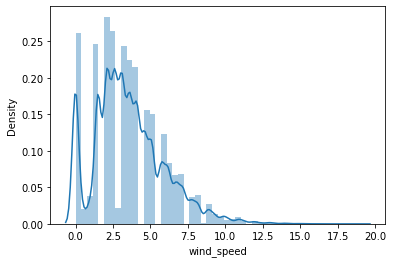

In [ ]:
sns.distplot(weather['wind_speed'])

#Question 7
Fill the mean data of the sea level pressure as mean value and make a graph of sea level pressure during 2016

In [ ]:
mean_value = weather['sea_level_pressure'].dropna().sum()/weather['sea_level_pressure'].dropna().shape[0]
print(mean_value)
weather['sea_level_pressure'] = weather['sea_level_pressure'].fillna(mean_value)

1016.1580380163371


In [ ]:
import plotly.graph_objects as go

In [ ]:
def pressure_graph(df):
    df = df.sort_values('timestamp')
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df['timestamp'], y=df['sea_level_pressure'], name="Sea Level Pressure", line_color='blue', opacity=0.7))
    fig.update_layout(template='plotly_dark',title_text='Sea Level Pressure', xaxis_rangeslider_visible=True)
    fig.show()

In [ ]:
a = int(input('Enter site id: '))
pressure_graph(weather[weather['site_id'] == a])

Enter site id: 2


#Question 8
Calculate and show the daily average temperature of place with specific side id, visualize the average temperature through months

In [ ]:
df = weather[['site_id','date','air_temperature']]

In [ ]:
df.set_index("site_id", inplace=True)

In [ ]:
def mean_tem(id):
  subdf = df.loc[id]
  subdf = subdf.set_index('date')
  A = subdf.resample('D').mean()
  A_month = subdf.resample('M').mean()
  A_year = subdf.resample('Y').mean()
  return A, A_month, A_year

In [ ]:
id = int(input('Enter site_id: '))
A, A_month, A_year = mean_tem(id)
print(A.head())
print(A_month)
print(A_year)

Enter site_id: 2
            air_temperature
date                       
2016-01-01         9.762500
2016-01-02        13.800000
2016-01-03        15.395833
2016-01-04        15.691667
2016-01-05        12.345833
            air_temperature
date                       
2016-01-31        12.908602
2016-02-29        18.778448
2016-03-31        21.008065
2016-04-30        23.339028
2016-05-31        26.783333
2016-06-30        35.239444
2016-07-31        36.340188
2016-08-31        33.477554
2016-09-30        30.498611
2016-10-31        27.159677
2016-11-30        19.574583
2016-12-31        14.017362
            air_temperature
date                       
2016-12-31        24.937481


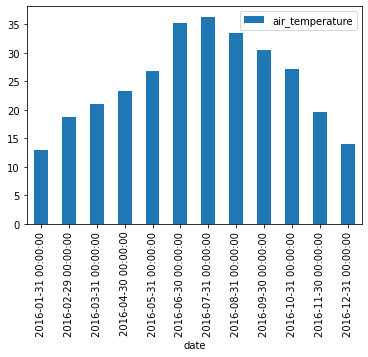

In [ ]:
ax = A_month.plot.bar()

#Question 9
Convert the wind direction to readable language

In [ ]:
def wind_deg_to_str(d):
  if   d >=  11.25 and d <  33.75: return 'NNE'
  elif d >=  33.75 and d <  56.25: return 'NE'
  elif d >=  56.25 and d <  78.75: return 'ENE'
  elif d >=  78.75 and d < 101.25: return 'E'
  elif d >= 101.25 and d < 123.75: return 'ESE'
  elif d >= 123.75 and d < 146.25: return 'SE'
  elif d >= 146.25 and d < 168.75: return 'SSE'
  elif d >= 168.75 and d < 191.25: return 'S'
  elif d >= 191.25 and d < 213.75: return 'SSW'
  elif d >= 213.75 and d < 236.25: return 'SW'
  elif d >= 236.25 and d < 258.75: return 'WSW'
  elif d >= 258.75 and d < 281.25: return 'W'
  elif d >= 281.25 and d < 303.75: return 'WNW'
  elif d >= 303.75 and d < 326.25: return 'NW'
  elif d >= 326.25 and d < 348.75: return 'NNW'
  else: return 'N'

In [ ]:
weather['wind_dir']= weather['wind_direction'].apply(wind_deg_to_str)

In [ ]:
weather.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,date,year,month,day,hour,wind_dir
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,2016-01-01 00:00:00,2016,1,1,0,N
1,0,2016-01-01 01:00:00,24.4,0.0,21.1,-1.0,1020.2,70.0,1.5,2016-01-01 01:00:00,2016,1,1,1,ENE
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0,2016-01-01 02:00:00,2016,1,1,2,N
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0,2016-01-01 03:00:00,2016,1,1,3,N
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6,2016-01-01 04:00:00,2016,1,1,4,WSW


#Question 10
Visualize the wind of specific site id

In [ ]:
def wind_news(weather):
    weather = weather[weather['wind_direction'] > 0]
    weather['wind_direction'][ weather['wind_direction'] < 11.25 ] = weather['wind_direction'][ weather['wind_direction'] < 11.25 ].apply(lambda x : x+360)
    
    wind_df = pd.DataFrame(columns=['direction', 'speed', 'frequency'])
    angle = [ (i * 22.5 - 11.25 + 360) % 360.0 for i in range(16) ]
    direction = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WMW', 'NW', 'NNW']
    speed = [i*2.5 for i in range(1, 9)]
    tot = 0
    for ang, d  in zip(angle, direction):
        for s in speed:
            cnt = weather[(ang <= weather['wind_direction'] ) & ( weather['wind_direction'] < ang+22.5 )&  (s-2.5 <= weather['wind_speed']) & (weather['wind_speed'] < s) ].shape[0]
            tot += cnt
            wind_df = wind_df.append({'direction': d, 'speed':s, 'frequency': cnt }, ignore_index=True)
    return wind_df

In [ ]:
def wind_direction_plot(weather, title):
    wind = wind_news(weather)
    fig = px.bar_polar(wind, r="frequency", theta="direction",
                       color="speed", template="plotly_dark",
                       color_discrete_sequence= px.colors.sequential.Plasma[2::1])
    fig.update_layout(title_text='Site ID {}'.format(title))
    fig.show()

In [ ]:
import plotly.express as px

In [ ]:
j = int(input('Enter site_id: '))
wind_direction_plot(weather[weather['site_id'] == j],j)

Enter site_id: 2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

